In [2]:
# libraries 
library(rethinking)  
library(tidyverse)  
library(lubridate)  
# library(data.table)  
# detach("package:rethinking", unload=TRUE) 


# Chapter 2 Practice Problems

## Easy

##### 2E1. Which of the expressions below correspond to the statement: the probability of rain on Monday?

##### 2E2. Which of the following statements corresponds to the expression: Pr(Monday|rain)?

(1) The probability of rain on Monday.
(2) The probability of rain, given that it is Monday. 
(3) The probability that it is Monday, given that it is raining. <-
(4) The probability that it is Monday and that it is raining.

##### 2E3. Which of the expressions below correspond to the statement: the probability that it is Monday, given that it is raining?

(1) Pr(Monday|rain) <-
(2) Pr(rain|Monday)
(3) Pr(rain|Monday) Pr(Monday)
(4) Pr(rain|Monday) Pr(Monday)/ Pr(rain) <-
(5) Pr(Monday|rain) Pr(rain)/ Pr(Monday)

##### 2E4. The Bayesian statistician Bruno de Finetti (1906–1985) began his 1973 book on probability theory with the declaration: “PROBABILITY DOES NOT EXIST.” 

The capitals appeared in the original, so I imagine de Finetti wanted us to shout this statement. 

What he meant is that probability is a device for describing uncertainty from the perspective of an observer with limited knowledge; it has no objective reality. 

Discuss the globe tossing example from the chapter, in light of this statement. 

What does it mean to say “the probability of water is 0.7”?

This problem is merely a prompt for readers to explore intuitions about probability.<font color = 'blue'> The goal is to help understand statements like “the probability of water is 0.7” as statements about partial knowledge, not as statements about physical processes. </font> 

> The physics of the globe toss are deterministic, not “random.” But we are substantially ignorant of those physics when we toss the globe. So when someone states that a process is “random,” this can mean nothing more than ignorance of the details that would permit predicting the outcome.

As a consequence, probabilities change when our information (or a model’s information) changes. Frequencies, in contrast, are facts about particular empirical contexts. They do not depend upon our information (although our beliefs about frequencies do).

This gives a new meaning to words like “randomization,” because it makes clear that when we shuffle a deck of playing cards, what we have done is merely remove our knowledge of the card order. A card is “random” because we cannot guess it.

## Medium

##### 2M1. Recall the globe tossing model from the chapter. 

Here is the recipe for grid approximation:

(1) Define the grid. This means you decide how many points to use in estimating the
    posterior, and then you make a list of the parameter values on the grid.

(2) Compute the value of the prior at each parameter value on the grid.

(3) Compute the likelihood at each parameter value.

(4) Compute the unstandardized posterior at each parameter value, by multiplying the
    prior by the likelihood.

(5) Finally, standardize the posterior, by dividing each value by the sum of all values.

###### SR soln

In [4]:
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

In [5]:
# define prior
prior <- rep( 1 , 20 )

In [33]:
# compute likelihood at each value in grid
likelihood <- dbinom( 3 , size=3 , prob=p_grid )

In [34]:
# compute likelihood at each value in grid
likelihood <- dbinom( 3 , size=4 , prob=p_grid )

In [35]:
# compute likelihood at each value in grid
likelihood <- dbinom( 5 , size=7 , prob=p_grid )

In [36]:
# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

In [21]:
# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

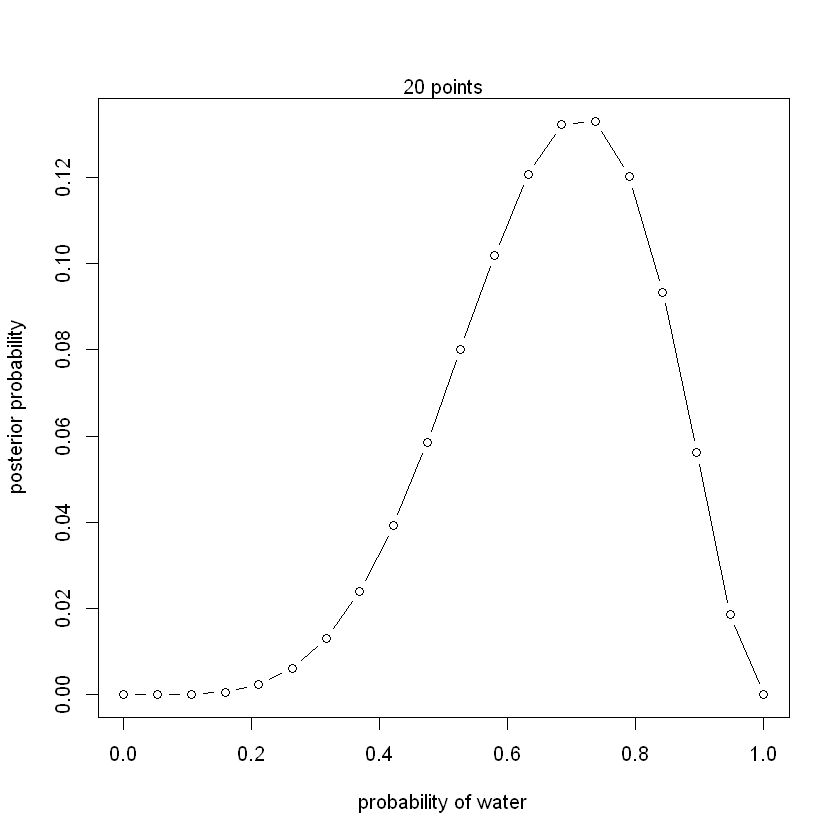

In [22]:
 plot( p_grid , posterior , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

###### Purr Version

In [41]:
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

In [42]:
# define prior
prior <- rep( 1 , 20 )

In [46]:
# likelihoods
waters <- list(3,3,5)
trials <- list(3,4,7)
ll <- map2(waters, trials, dbinom, prob=p_grid)

In [48]:
# compute product of likelihood and prior
unstd.posterior <- map(ll, function(ll) ll*prior)

In [51]:
# compute product of likelihood and prior
posterior <- map(unstd.posterior, function(unstd.posterior) unstd.posterior/sum(unstd.posterior))

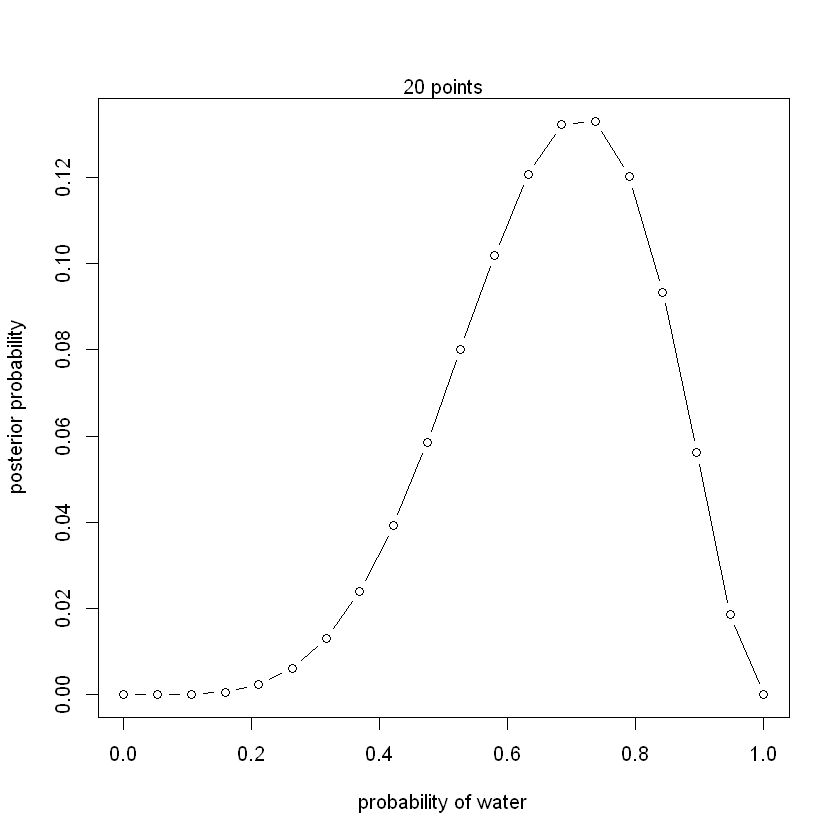

In [22]:
plot( p_grid , posterior , type="b" ,
xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

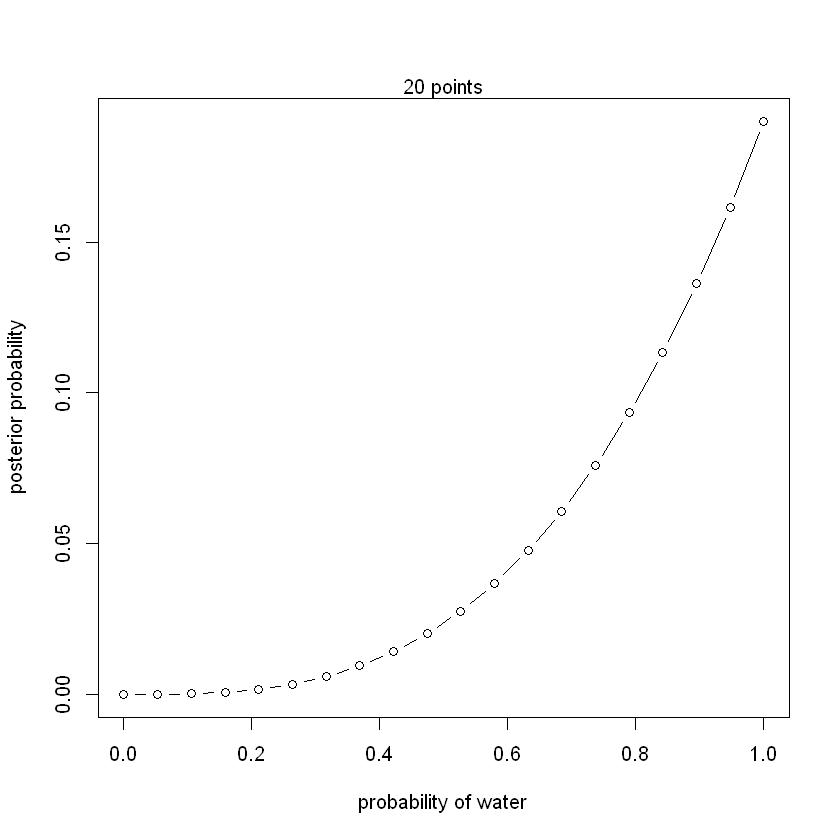

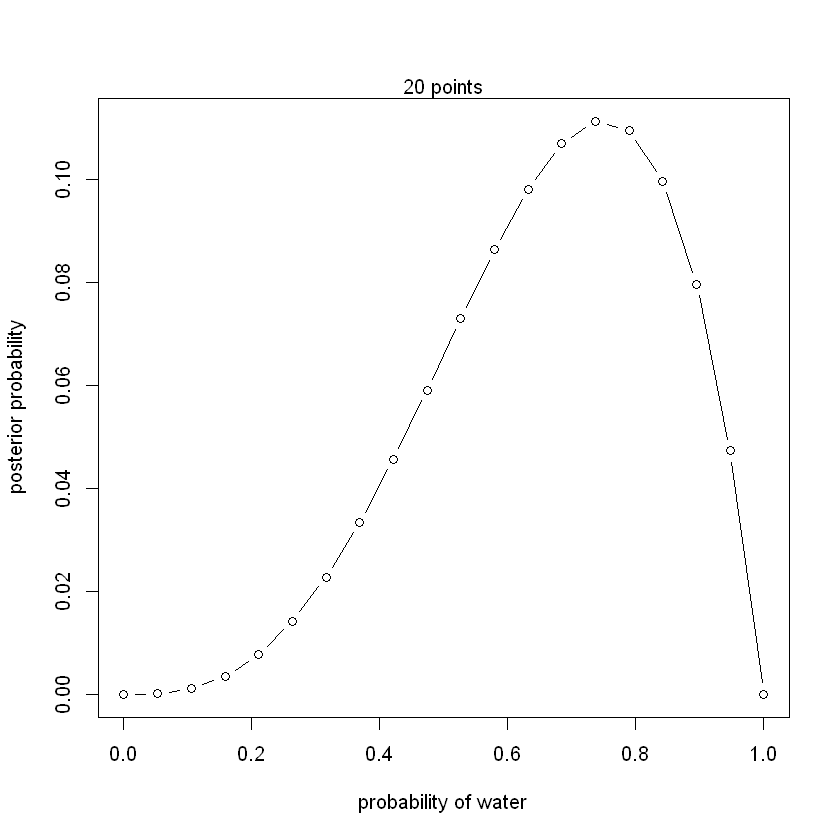

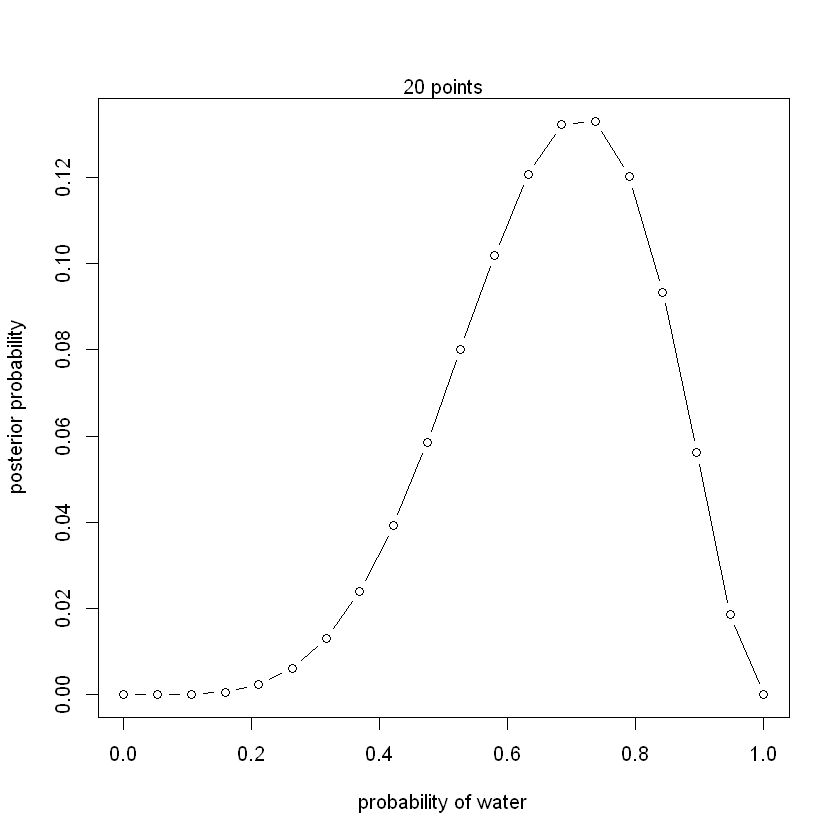

In [60]:
for (i in seq_along(posterior)){
    plot(p_grid, posterior[[i]], type="b",
        xlab="probability of water" , ylab="posterior probability" )
    mtext( "20 points" )
}

##### 2M2. Now assume a prior for p that is equal to zero when p < 0.5 and is a positive constant when p ≥ 0.5. 

Again compute and plot the grid approximate posterior distribution for each of the sets of
observations in the problem just above.

2M3. Suppose there are two globes, one for Earth and one for Mars. The Earth globe is 70% covered
in water. The Mars globe is 100% land. Further suppose that one of these globes—you don’t know
which—was tossed in the air and produced a “land” observation. Assume that each globe was equally
likely to be tossed. Show that the posterior probability that the globe was the Earth, conditional on
seeing “land” (Pr(Earth|land)), is 0.23.

2M4. Suppose you have a deck with only three cards. Each card has two sides, and each side is either
black or white. One card has two black sides. The second card has one black and one white side. The
third card has two white sides. Now suppose all three cards are placed in a bag and shuffled. Someone
reaches into the bag and pulls out a card and places it flat on a table. A black side is shown facing up,
but you don’t know the color of the side facing down. Show that the probability that the other side is
also black is 2/3. Use the counting method (Section 2 of the chapter) to approach this problem. This
means counting up the ways that each card could produce the observed data (a black side facing up
on the table).

2M5. Now suppose there are four cards: B/B, B/W, W/W, and another B/B. Again suppose a card is
drawn from the bag and a black side appears face up. Again calculate the probability that the other
side is black.

2M6. Imagine that black ink is heavy, and so cards with black sides are heavier than cards with white
sides. As a result, it’s less likely that a card with black sides is pulled from the bag. So again assume
there are three cards: B/B, B/W, and W/W. After experimenting a number of times, you conclude that
for every way to pull the B/B card from the bag, there are 2 ways to pull the B/W card and 3 ways to
pull the W/W card. Again suppose that a card is pulled and a black side appears face up. Show that
the probability the other side is black is now 0.5. Use the counting method, as before.

2M7. Assume again the original card problem, with a single card showing a black side face up. Before
looking at the other side, we draw another card from the bag and lay it face up on the table. The face
that is shown on the new card is white. Show that the probability that the first card, the one showing
a black side, has black on its other side is now 0.75. Use the counting method, if you can. Hint: Treat
this like the sequence of globe tosses, counting all the ways to see each observation, for each possible
first card.